In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('airline_clnd.csv')
df.head(2)

,SR,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied


In [3]:
df.columns

Index(['SR', 'id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

In [4]:
df.shape

(103904, 25)

## Feature Engineering and EDA

In [5]:
# Removing unnecessary columns and less correlated column.

df.drop(columns=['SR', 'id', 'Gate_location'], axis=1, inplace=True)

In [6]:
# Checking for missing values
df.isnull().sum()

Gender                                 0
Customer_Type                          0
Age                                    0
Type_of_Travel                         0
Class                                  0
Flight_Distance                        0
Inflight_wifi_service                  0
Departure/Arrival_time_convenient      0
Ease_of_Online_booking                 0
Food_and_drink                         0
Online_boarding                        0
Seat_comfort                           0
Inflight_entertainment                 0
On-board_service                       0
Leg_room_service                       0
Baggage_handling                       0
Checkin_service                        0
Inflight_service                       0
Cleanliness                            0
Departure_Delay_in_Minutes             0
Arrival_Delay_in_Minutes             310
satisfaction                           0
dtype: int64

In [7]:
df[df['Arrival_Delay_in_Minutes'].isnull()].head(2)

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Food_and_drink,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
213,Female,Loyal Customer,38,Business travel,Eco,109,5,3,3,5,...,5,5,2,4,1,1,5,31,NaN,satisfied
1124,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,3,4,...,4,4,4,4,3,3,4,38,NaN,neutral or dissatisfied


In [8]:
df['Arrival_Delay_in_Minutes'].describe()

count    103594.000000
mean         15.178678
std          38.698682
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival_Delay_in_Minutes, dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer_Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type_of_Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight_Distance                    103904 non-null  int64  
 6   Inflight_wifi_service              103904 non-null  int64  
 7   Departure/Arrival_time_convenient  103904 non-null  int64  
 8   Ease_of_Online_booking             103904 non-null  int64  
 9   Food_and_drink                     103904 non-null  int64  
 10  Online_boarding                    103904 non-null  int64  
 11  Seat_comfort                       1039

In [10]:
# Filling missing values with mean.
df['Arrival_Delay_in_Minutes'] = df['Arrival_Delay_in_Minutes'].fillna(df['Arrival_Delay_in_Minutes'].mean())

In [11]:
df['Arrival_Delay_in_Minutes'].isnull().sum()

np.int64(0)

In [12]:
# Checking for duplicate rows.
df[df.duplicated()]

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Food_and_drink,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction


In [15]:
# Data Encoding.
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoded_genderdata = encoder.fit_transform(df[['Gender']]).toarray().astype(int)
encoder_df = pd.DataFrame(encoded_genderdata, columns=encoder.get_feature_names_out())
df = pd.concat([df, encoder_df], axis=1)

In [16]:
df['Customer_Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [17]:
encoder2 = OneHotEncoder()
encoded_customerdata = encoder2.fit_transform(df[['Customer_Type']]).toarray().astype(int)
encoder_df2 = pd.DataFrame(encoded_customerdata, columns=encoder2.get_feature_names_out())
df = pd.concat([df, encoder_df2], axis=1)

In [18]:
df['Type_of_Travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [19]:
df['Class'].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [20]:
encoder3 = OneHotEncoder()
encoded_traveltypedata = encoder3.fit_transform(df[['Type_of_Travel']]).toarray().astype(int)
encoder_df3 = pd.DataFrame(encoded_traveltypedata, columns=encoder3.get_feature_names_out())
df = pd.concat([df, encoder_df3], axis=1)
encoder4 = OneHotEncoder()
encoded_classdata = encoder4.fit_transform(df[['Class']]).toarray().astype(int)
encoder_df4 = pd.DataFrame(encoded_classdata, columns=encoder4.get_feature_names_out())
df = pd.concat([df, encoder_df4], axis=1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 31 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer_Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type_of_Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight_Distance                    103904 non-null  int64  
 6   Inflight_wifi_service              103904 non-null  int64  
 7   Departure/Arrival_time_convenient  103904 non-null  int64  
 8   Ease_of_Online_booking             103904 non-null  int64  
 9   Food_and_drink                     103904 non-null  int64  
 10  Online_boarding                    103904 non-null  int64  
 11  Seat_comfort                       1039

In [22]:
df.drop(columns=['Gender', 'Customer_Type', 'Type_of_Travel','Class'], axis=1, inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 27 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Age                                103904 non-null  int64  
 1   Flight_Distance                    103904 non-null  int64  
 2   Inflight_wifi_service              103904 non-null  int64  
 3   Departure/Arrival_time_convenient  103904 non-null  int64  
 4   Ease_of_Online_booking             103904 non-null  int64  
 5   Food_and_drink                     103904 non-null  int64  
 6   Online_boarding                    103904 non-null  int64  
 7   Seat_comfort                       103904 non-null  int64  
 8   Inflight_entertainment             103904 non-null  int64  
 9   On-board_service                   103904 non-null  int64  
 10  Leg_room_service                   103904 non-null  int64  
 11  Baggage_handling                   1039

In [24]:
df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied':0, 'satisfied':1})

# Standardization

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y = df['satisfaction']
df.drop(columns=['satisfaction'], axis=1, inplace=True)
x_scaled = scaler.fit_transform(df)
x_scaled

array([[-1.7452793 , -0.73153876,  0.20357895, ..., -0.95690623,
        -0.90432653,  3.58677552],
       [-0.95136024, -0.95718354,  0.20357895, ...,  1.04503447,
        -0.90432653, -0.27880195],
       [-0.88520032, -0.04758435, -0.54953343, ...,  1.04503447,
        -0.90432653, -0.27880195],
       ...,
       [-0.62056063,  0.8078601 , -1.30264581, ...,  1.04503447,
        -0.90432653, -0.27880195],
       [-1.14984   , -0.18999128, -1.30264581, ..., -0.95690623,
         1.10579527, -0.27880195],
       [-0.8190404 ,  0.53508063, -1.30264581, ...,  1.04503447,
        -0.90432653, -0.27880195]], shape=(103904, 26))

# Principal Component Analysis

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_scaled = pca.fit_transform(x_scaled)

In [25]:
pca.explained_variance_

array([4.5582787, 2.9988185])

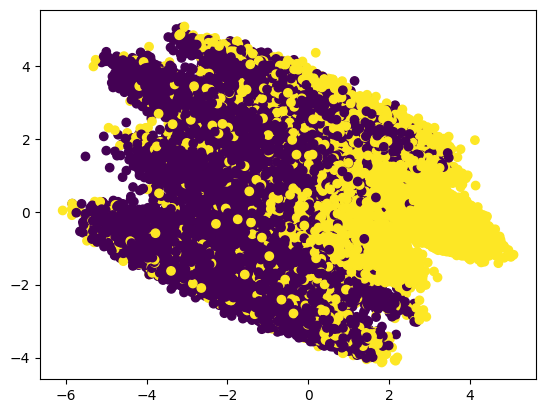

In [26]:
plt.scatter(pca_scaled[:,0], pca_scaled[:,1], c=y)

27 components -> 2 components.

# K-Means Clustering

In [27]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=2)
kmeans_model.fit(pca_scaled)

KMeans(n_clusters=2)

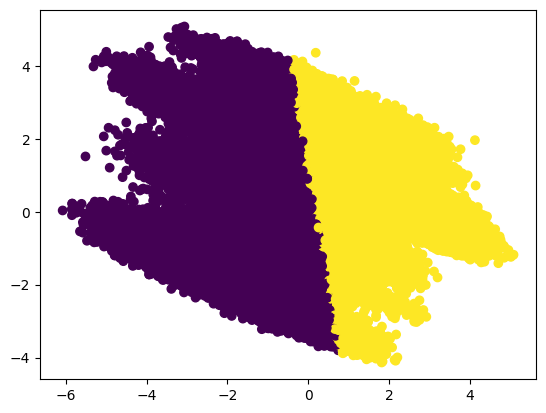

In [28]:
plt.scatter(pca_scaled[:,0], pca_scaled[:,1], c=kmeans_model.labels_)

## DBSCAN Clustering

In [29]:
from sklearn.cluster import DBSCAN
dbscan_clustering = DBSCAN()
dbscan_clustering.fit(pca_scaled)

DBSCAN()

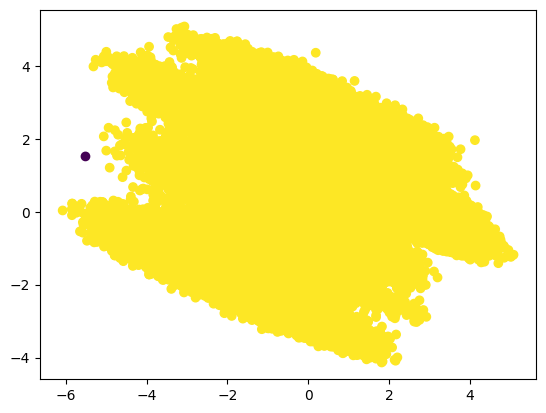

In [30]:
plt.scatter(pca_scaled[:,0], pca_scaled[:,1], c=dbscan_clustering.labels_)

In [31]:
from sklearn.metrics import accuracy_score
print(accuracy_score(kmeans_model.labels_, y))
print(accuracy_score(dbscan_clustering.labels_, y))

0.8309497228210656
0.5666576840160148


In [32]:
# Calculating silhoutte score
from sklearn.metrics import silhouette_score
kmeans_performance = silhouette_score(pca_scaled, kmeans_model.labels_)
print(kmeans_performance)

0.40740170958110655


In [36]:
import pickle
with open('../pickle_files/scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)
with open('../pickle_files/pca_model.pkl', 'wb') as pca_file:
    pickle.dump(pca, pca_file)
with open('../pickle_files/kmeans_model.pkl', 'wb') as kmeans_file:
    pickle.dump(kmeans_model, kmeans_file)
with open('../pickle_files/encoder1.pkl', 'wb') as encoder1_file:
    pickle.dump(encoder, encoder1_file)
with open('../pickle_files/encoder2.pkl', 'wb') as encoder2_file:
    pickle.dump(encoder2, encoder2_file)
with open('../pickle_files/encoder3.pkl', 'wb') as encoder3_file:
    pickle.dump(encoder3, encoder3_file)
with open('../pickle_files/encoder4.pkl', 'wb') as encoder4_file:
    pickle.dump(encoder4, encoder4_file)